In [9]:
#imporing essentials

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# For downloading Updated Dataset

import yfinance as yf
from dateutil.relativedelta import relativedelta

#Libraries for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#to create pickle file
import pickle

In [10]:
os.remove("file.csv")

In [11]:
currentTimeDate = dt.datetime.now() - relativedelta(years=5)
currentTime = currentTimeDate.strftime(format='%Y-%m-%d')
nct = str(currentTime)
db = yf.download("BTC-USD", start = nct , end = dt.datetime.now() )
db.to_csv("file.csv")

[*********************100%***********************]  1 of 1 completed


In [12]:
maindf=pd.read_csv('file.csv')

In [13]:
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
X = maindf[numerical_cols].values

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform PCA
pca = PCA()
pca.fit(X_scaled)

# get the principal components
components = pca.components_

# get the explained variance ratio
variance_ratio = pca.explained_variance_ratio_

# print the results
print('Principal components:')
print(components)
print('\nExplained variance ratio:')
print(variance_ratio)

Principal components:
[[ 4.31052516e-01  4.31575312e-01  4.30399084e-01  4.31108682e-01
   4.31108682e-01  2.66427693e-01]
 [-1.15435907e-01 -1.05082050e-01 -1.36860583e-01 -1.19128194e-01
  -1.19128194e-01  9.63596618e-01]
 [ 7.32881755e-01  1.93581765e-01 -9.59850629e-04 -4.61184260e-01
  -4.61184260e-01 -5.26010906e-03]
 [ 2.33784362e-02  5.40974029e-01 -8.19089489e-01  1.33088170e-01
   1.33088170e-01 -2.16341428e-02]
 [-5.13036121e-01  6.87439970e-01  3.53719236e-01 -2.63724089e-01
  -2.63724089e-01 -1.46214385e-03]
 [-0.00000000e+00 -5.10106695e-15  7.54006729e-15  7.07106781e-01
  -7.07106781e-01  2.02410019e-16]]

Explained variance ratio:
[8.87724007e-01 1.11632267e-01 4.17142501e-04 1.87553683e-04
 3.90290971e-05 4.01903326e-35]


In [14]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  1827
Total number of fields present in the dataset:  7


In [15]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


In [16]:
maindf.describe()


Open          High           Low         Close     Adj Close  \
count   1827.000000   1827.000000   1827.000000   1827.000000   1827.000000   
mean   21032.625512  21538.299043  20477.204986  21041.692291  21041.692291   
std    16834.689578  17278.339057  16316.798213  16827.661199  16827.661199   
min     3236.274658   3275.377930   3191.303467   3236.761719   3236.761719   
25%     7850.785645   8058.414062   7646.816162   7880.458984   7880.458984   
50%    11895.658203  12144.623047  11662.256836  11916.334961  11916.334961   
75%    33767.375000  34778.076172  32265.797852  33734.515625  33734.515625   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  1.827000e+03  
mean   2.742977e+10  
std    1.948599e+10  
min    2.923670e+09  
25%    1.519029e+10  
50%    2.529378e+10  
75%    3.613765e+10  
max    3.509679e+11

In [17]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [18]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [19]:
# If dataset had null values we can use this code to drop all the null values present in the dataset

maindf=maindf.dropna()
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 0
NA values: False


In [20]:
sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2018-04-09
Ending Date 2023-04-09


In [21]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2018 = maindf.loc[(maindf['Date'] >= '2018-01-17')
                     & (maindf['Date'] < '2018-12-31')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

Date         Open         High          Low        Close
0   2018-04-09  7044.319824  7178.109863  6661.990234  6770.729980
1   2018-04-10  6795.439941  6872.410156  6704.149902  6834.759766
2   2018-04-11  6843.470215  6968.319824  6817.589844  6968.319824
3   2018-04-12  6955.379883  7899.229980  6806.509766  7889.250000
4   2018-04-13  7901.089844  8183.959961  7758.930176  7895.959961
..         ...          ...          ...          ...          ...
261 2018-12-26  3819.666748  3893.359619  3769.863770  3857.297607
262 2018-12-27  3854.688477  3874.416992  3645.448486  3654.833496
263 2018-12-28  3653.131836  3956.135986  3642.632080  3923.918701
264 2018-12-29  3932.491699  3963.758789  3820.408691  3820.408691
265 2018-12-30  3822.384766  3901.908936  3797.219238  3865.952637

[266 rows x 5 columns]

In [22]:
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open        Close
Date                               
January            NaN          NaN
February           NaN          NaN
March              NaN          NaN
April      8331.220903  8426.705433
May        8505.240675  8450.997732
June       6829.257975  6793.507666
July       7101.466450  7146.349987
August     6723.800955  6700.129946
September  6622.821338  6610.675033
October    6494.016491  6485.118747
November   5481.615120  5404.250171
December   3721.796305  3716.647941

In [23]:
fig = go.Figure()
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [24]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price',
                  font = dict(color = 'white'))
fig.show()

In [25]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'], 
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='white',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names))) 
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.show()

The main LSTM Model starts here

In [26]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1827, 2)


In [27]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price for last 5 years', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [28]:
closedf = closedf[closedf['Date'] > '2018-01-09']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1827


In [29]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [30]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1827, 1)


In [31]:
# we keep the training set as 80% and 20% testing set

training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1461, 1)
test_data:  (366, 1)


In [32]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [33]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1445, 15)
y_train:  (1445,)
X_test:  (350, 15)
y_test (350,)


In [34]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1445, 15, 1)
X_test:  (350, 15, 1)


In [35]:
model=Sequential()
model.add(LSTM(10,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [37]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=64,verbose=1)
pickle.dump(history, open('model.pkl','wb'))

Epoch 1/200
23/23 [==============================] - 0s 8ms/step - loss: 2.7495e-04 - val_loss: 1.9426e-04
Epoch 2/200
23/23 [==============================] - 0s 7ms/step - loss: 2.7416e-04 - val_loss: 2.0263e-04
Epoch 3/200
23/23 [==============================] - 0s 7ms/step - loss: 2.7974e-04 - val_loss: 1.8811e-04
Epoch 4/200
23/23 [==============================] - 0s 7ms/step - loss: 2.8256e-04 - val_loss: 1.9164e-04
Epoch 5/200
23/23 [==============================] - 0s 7ms/step - loss: 2.8091e-04 - val_loss: 2.0360e-04
Epoch 6/200
23/23 [==============================] - 0s 7ms/step - loss: 2.7379e-04 - val_loss: 1.9798e-04
Epoch 7/200
23/23 [==============================] - 0s 7ms/step - loss: 2.8680e-04 - val_loss: 1.9834e-04
Epoch 8/200
23/23 [==============================] - 0s 7ms/step - loss: 2.8656e-04 - val_loss: 1.8177e-04
Epoch 9/200
23/23 [==============================] - 0s 7ms/step - loss: 2.7716e-04 - val_loss: 2.3313e-04
Epoch 10/200
23/23 [=================

In [49]:
# depickling the file
history = pickle.load(open('model.pkl','rb'))

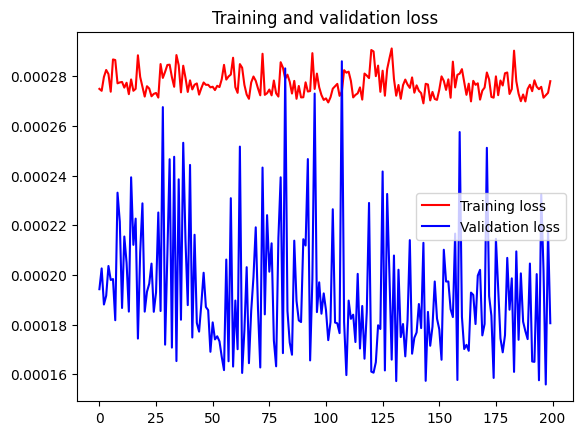

<Figure size 640x480 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [39]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

11/11 [==============================] - 0s 2ms/step


((1445, 1), (350, 1))

In [40]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [41]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1054.1236525423449
Train data MSE:  1111176.6748492143
Train data MAE:  580.5403920104347
-------------------------------------------------------------------------------------
Test data RMSE:  864.4269734402519
Test data MSE:  747233.992411074
Test data MAE:  587.2223660714286


In [42]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9967844731562181
Test data explained variance regression score: 0.9748919140844515


In [43]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0016024155143745996
Test data MGD:  0.0012628042525590073
----------------------------------------------------------------------
Train data MPD:  31.264887908783372
Test data MPD:  30.010925292689404


In [44]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='white', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1827, 1)
Test predicted data:  (1827, 1)


In [45]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 1
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  1


In [46]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16]


In [47]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='white',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [48]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock_price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='black', font_size=15, font_color='white',legend_title_text='Stock')
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black'
})

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig['layout']['yaxis'].update(autorange = True)
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()